In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# get unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# get the number of data points from the urban cities
print(sum(city_data_df["type"]=="Urban"))
print(sum(city_data_df["type"]=="Suburban"))
print(sum(city_data_df["type"]=="Rural"))

66
36
18


In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# combine data into single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# create city type DataFrames
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
sub_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [15]:
# create Series for number of rides for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
sub_ride_count = sub_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [16]:
# create Series for average fare for each city typeb
avg_urban_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
avg_sub_fare = sub_cities_df.groupby(["city"]).mean()["fare"]
avg_rural_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

avg_rural_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [17]:
avg_urban_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
avg_sub_drivers = sub_cities_df.groupby(["city"]).mean()["driver_count"]
avg_rural_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

avg_rural_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

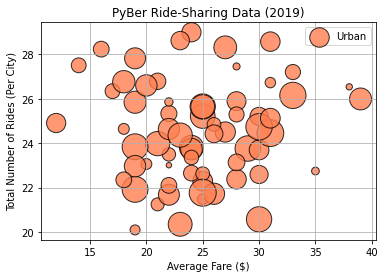

In [18]:
# build scatter plots
plt.scatter(urban_ride_count, avg_urban_fare, s=10*avg_urban_drivers, color='coral', alpha=0.8, label='Urban', edgecolor='black', linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

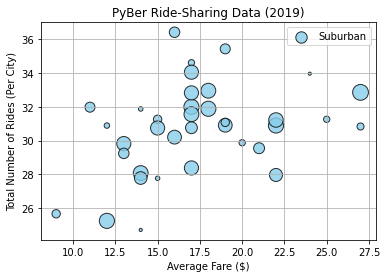

In [19]:
plt.scatter(sub_ride_count, avg_sub_fare, s=10*avg_sub_drivers, color='skyblue', alpha=0.8, label='Suburban', edgecolor='black', linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

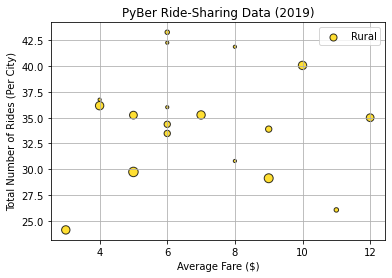

In [20]:
plt.scatter(rural_ride_count, avg_rural_fare, s=10*avg_rural_drivers, color='gold', alpha=0.8, label='Rural', edgecolor='black', linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

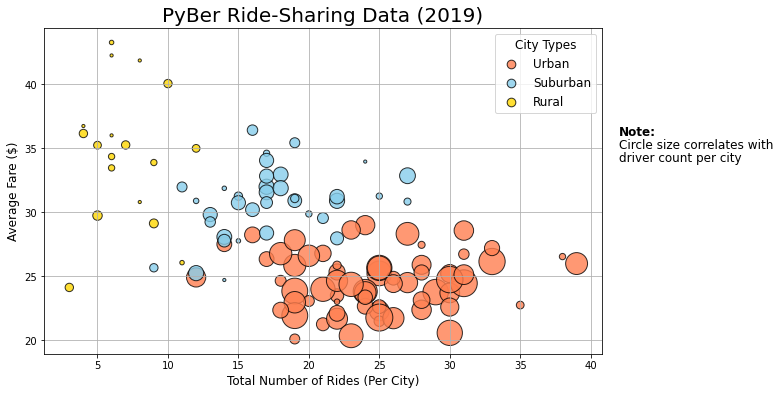

<Figure size 432x288 with 0 Axes>

In [79]:
# combine the scatter plots
# Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,
      avg_urban_fare,
      s=10*avg_urban_drivers, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(sub_ride_count,
      avg_sub_fare,
      s=10*avg_sub_drivers, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      avg_rural_fare,
      s=10*avg_rural_drivers, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 36, "Note:", fontsize="12", weight='bold')
plt.text(42, 35, "Circle size correlates with", fontsize="12")
plt.text(42, 34, "driver count per city", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [22]:
# summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [23]:
sub_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [24]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [25]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [26]:
sub_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [27]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(sub_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# calculate the mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [32]:
# Import NumPy and the stats module from SciPy

import numpy as np
import scipy.stats as sts

In [41]:
# calculate the measures of central tendency for the ride count for the type of city
# Urban
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.\n")

# Suburban
mean_sub_ride_count = np.mean(sub_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_sub_ride_count:.2f}.")

median_sub_ride_count = np.median(sub_ride_count)
print(f"The median for the ride counts for suburban trips is {median_sub_ride_count}.")

mode_sub_ride_count = sts.mode(sub_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_sub_ride_count}.\n")

# Rural
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [45]:
# get the fares for city types
urban_fares = urban_cities_df["fare"]
sub_fares = sub_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [47]:
# calculate measures of central tendency for average fares
# Urban
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.\n")

# Suburban
mean_sub_fares = np.mean(sub_fares)
print(f"The mean fare price for suburban trips is ${mean_sub_fares:.2f}.")

median_sub_fares = np.median(urban_fares)
print(f"The median fare price for suburban trips is ${median_sub_fares:.2f}.")

mode_sub_fares = sts.mode(urban_fares)
print(f"The mode fare price for suburban trips is {mode_sub_fares}.\n")

# Rural
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(urban_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(urban_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $24.64.
The mode fare price for suburban trips is ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $24.64.
The mode fare price for rural trips is ModeResult(mode=array([22.86]), count=array([5])).


In [49]:
# get the driver count data for each city type
urban_drivers = urban_cities_df["driver_count"]
sub_drivers = sub_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [53]:
# calculate measures of central tendency for average fares
# Urban
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.\n")

# Suburban
mean_sub_drivers = np.mean(sub_drivers)
print(f"The mean driver count for suburban trips is {mean_sub_drivers:.0f}.")

median_sub_drivers = np.median(sub_drivers)
print(f"The median driver count for suburban trips is {median_sub_drivers:.0f}.")

mode_sub_drivers = sts.mode(sub_drivers)
print(f"The mode driver count for suburban trips is {mode_sub_drivers}.\n")

# Rural
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(urban_drivers)
print(f"The median driver count for rural trips is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for urban trips is 37.
The median driver count for urban trips is 37.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).

The mean driver count for suburban trips is 14.
The median driver count for suburban trips is 16.
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).

The mean driver count for rural trips is 4.
The median driver count for rural trips is 37.
The mode driver count for rural trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


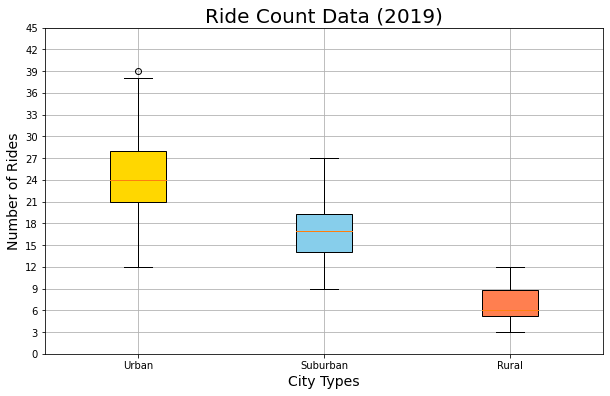

In [77]:
# create box & whisker plot for ride count for each city type
x_labels = ["Urban", "Suburban", "Rural"]

ride_count_data = [urban_ride_count, sub_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

box = ax.boxplot(ride_count_data, labels=x_labels, patch_artist=True)

colors = ['gold', 'skyblue', 'coral']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_xlabel("City Types",fontsize=14)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_yticks(np.arange(0, 46, step=3.0))
ax.grid()


plt.savefig("analysis/Fig2.png")

plt.show()

In [61]:
# get the city that matches the outlier (39)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


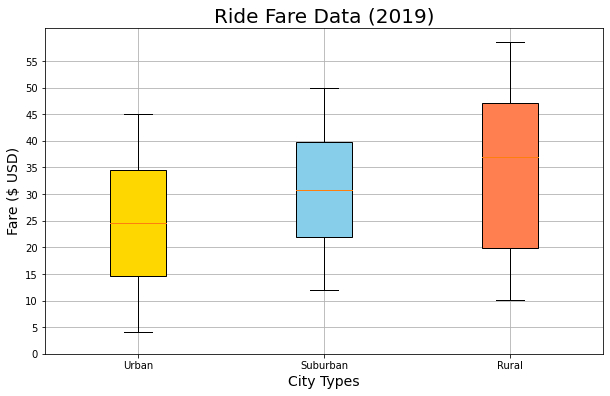

In [78]:
# create box & whisker plot for fare data for each city type
x_labels = ["Urban", "Suburban", "Rural"]

ride_fare_data = [urban_fares, sub_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))

box = ax.boxplot(ride_fare_data, labels=x_labels, patch_artist=True)

colors = ['gold', 'skyblue', 'coral']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_xlabel("City Types",fontsize=14)
ax.set_ylabel("Fare ($ USD)", fontsize=14)
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()


plt.savefig("analysis/Fig3.png")

plt.show()

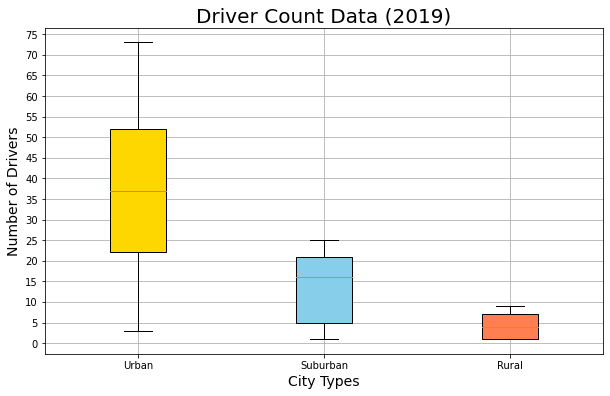

In [76]:
# create the box-and-whisker plot for driver count data for each city type
x_labels = ["Urban", "Suburban", "Rural"]

driver_count_data = [urban_drivers, sub_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))

box = ax.boxplot(driver_count_data, labels=x_labels, patch_artist=True)

# add the title, y-axis label and grid
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_xlabel("City Types",fontsize=14)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

colors = ['gold', 'skyblue', 'coral']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig("analysis/Fig4.png")

plt.show()